<a href="https://colab.research.google.com/github/AngSuAnz/clinica_de_datos/blob/main/FINAL_Metodos_Cuantitativos_2023_Lince_Suarez_Regulacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Final: Metodos Cuantitativos Aplicados a Estudios Urbanos

**Profesor** Ricardo Pasquini \
Universidad Torcuato Di Tella \
[rpasquini@utdt.edu](rpasquini@utdt.edu)

**Alumnos** Matías Lince Marino y Ángeles Suarez Anzorena \

En este trabajo final vamos a analizar posibles determinantes del valor de los terrenos en CABA. En particular, vamos a estudiar  cuestiones relacionadas a la regulación constructiva.

Los datos fueron compilados del sitio [Buenos Aires Data](https://data.buenosaires.gob.ar/). Si bien utilizaremos esta base de datos para los fines del trabajo práctico, la misma no deben ser utilizada para investigación, ya que el procedimiento que se utilizó para combinar los datos debe revisarse y podría presentar errores o inconsistencias.


In [145]:
!pip install contextily

In [146]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
import statsmodels.api as sm
import numpy as np

In [147]:
#Levantamos los datos a un geodataframe desde el link
gdf=gpd.GeoDataFrame.from_file("https://github.com/rpasquini/metodos_cuantitativos/raw/main/data/terrenos_2020_cregu_parcelas.zip")
gdf

,DIRECCION,SUPERFICIE,PRECIOUSD,PRECIOPESO,DOLARM2,PESOSM2,COTIZACION,TRIMESTRE_,BARRIO,COMUNA_,...,unidades,area,edificabil,diferencia,edificab_1,diferenc_1,plusvalia,plusvaliap,plusvalia_,geometry
0,"PERON, JUAN DOMINGO, TTE. 3400",211,265000,21200000,1256,100474,80,CUARTO,ALMAGRO,5,...,11,659.6,727.95,-329.55,2275.620,-1777.620,0.000,0.000000,0.000000,POINT (104455.282 102452.878)
1,SANCHEZ DE BUSTAMANTE 200,348,590000,37612500,1695,108082,64,PRIMER,ALMAGRO,5,...,11,659.6,1200.60,-802.20,2275.620,-1777.620,0.000,0.000000,0.000000,POINT (104453.692 102452.943)
2,MEXICO 4000,320,300000,24000000,938,75000,80,CUARTO,ALMAGRO,5,...,0,426.3,512.00,-219.20,682.080,-316.080,0.000,0.000000,0.000000,POINT (103757.531 101006.535)
3,VENEZUELA 4067,250,305000,24400000,1220,97600,80,CUARTO,ALMAGRO,5,...,0,118.4,400.00,-283.20,189.440,-43.440,0.000,0.000000,0.000000,POINT (103765.317 101277.336)
4,LAVALLE 3300,150,320000,25600000,2133,170667,80,CUARTO,ALMAGRO,5,...,0,281.9,240.00,103.20,451.040,-22.040,23127.120,154.180800,154.180800,POINT (104651.516 103068.105)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,YERBAL 2700,563,1390000,88612500,2469,157393,64,TERCER,FLORES NORTE,7,...,0,988.5,1615.81,-1289.41,2836.995,-2428.995,0.000,0.000000,0.000000,POINT (99621.966 100060.088)
4904,PAEZ 2000,176,399000,25436250,2267,144524,64,TERCER,FLORES NORTE,7,...,2,228.6,484.00,-180.00,628.650,-248.650,0.000,0.000000,0.000000,POINT (100150.121 101237.566)
4905,"BONORINO, ESTEBAN, Cnel. 300",149,430000,27412500,2886,183976,64,PRIMER,FLORES NORTE,7,...,0,528.3,409.75,133.45,1452.825,-773.825,14893.020,99.953154,99.953154,POINT (100463.785 99758.316)
4906,"ALVAREZ, DONATO, Tte. Gral. 200",771,690000,43987500,895,57052,64,PRIMER,FLORES NORTE,7,...,33,659.7,2675.37,678.23,2289.159,1902.841,85456.980,110.839144,110.839144,POINT (100757.708 100642.521)


# Un primer vistazo de los datos

(-58.536700402460426,
 -58.3460615293704,
 -34.702178286661066,
 -34.53226349546769)

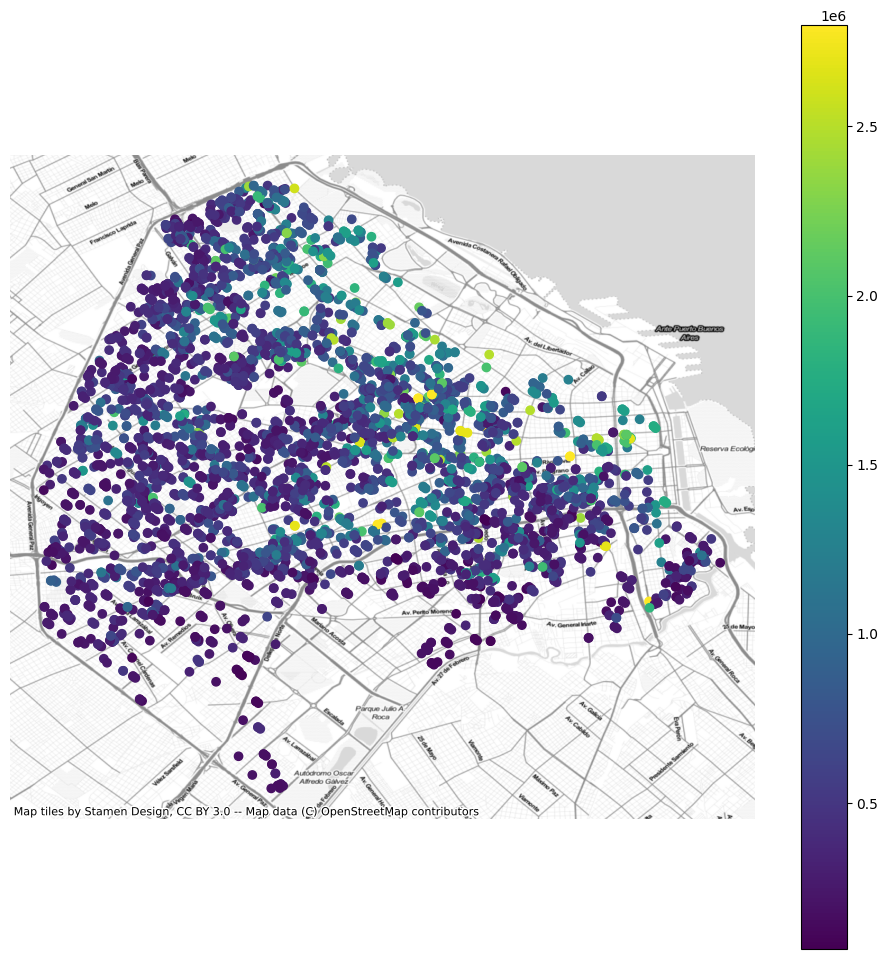

In [148]:
fig, ax = plt.subplots(figsize=(12, 12))
gdf.to_crs("EPSG:4326").plot(ax=ax,column='PRECIOUSD', legend=True)
#ax.set_xlim(-59.2, -58)
#ax.set_ylim(-35, -34.1)
cx.add_basemap(ax, crs=gdf.to_crs(epsg=4326).crs.to_string(), source=cx.providers.Stamen.TonerLite)
ax.axis('off')
#plt.title(ciudad)

Basándonos en el mapa generado, observamos la distribución de los datos georeferenciados:
- En primer lugar, cabe destacar que por este medio se evidencia que los datos levantados corresponden al mercado inmobiliario formal. Ciertas zonas de la ciudad, sabidamente pobladas y densas carecen de datos; esto se corresponde con urbanizaciones informales o barrios de menores recursos donde la información probablemente sea menos accesible.
- Por otro lado, vemos una fuerte predominancia de propiedades en el rango entre 1000000 y 500000 USD, con menores ocurrencias para valores más elevados.
- En línea con el punto anterior, se ve con claridad que los datos más extremos (superiores a los 2000000USD), se ubican principalmente en el este de la ciudad, mientras que los valores más bajos se acumulan hacia el oeste.

Con este pantallazo inicial, y conociendo en lineas generales las dinámicas urbanas de la Ciudad de Buenos Aires, la distribución de los datos no nos llama la atención, sino más bien se condice con lo esperado. \
Sin embargo, para poder afirmar fehacientemente la relación causal entre los factores que suponemos influyentes y el precio de los lotes contenidos en la base de datos, nos disponemos a implementar los metodos cuantitativos estudiados.

### Descripcion de campos
| campo      | tipo    | descripcion                                                                                                                                                                                             |
| ---------- | ------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| SUPERFICIE       | int  | Superficie en m2     
| PRECIOUSD | int  | Precio terreno en USD
| COTIZACION |	int | Cotizacion del USD en pesos
| TRIMESTRE | string | Trimestre
| BARRIO	 | string | Barrio
| COMUNA | int | Nro de Comuna
| smp1       | string  | Corresponde al número de identificación de la Sección-Manzana-Parcela                                                                                                                                   |
| sm         | string  | Corresponde al número de identificación de la Sección-Manzana              |
| uni_edif_1 | number  | Unidad de edificabilidad 1: define la altura máxima aplicable a cada Unidad de la Ciudad de Buenos Aires
| plusvalia | number  | Estimación de la plusvalia que debería pagar el desarrollador si aprovechase la máxima capacidad constructiva

# Pregunta 1

Suponga que el valor al que se oferta un terreno puede modelarse de la siguiente manera:

$$PrecioUSD_i=\beta_0+\beta_1\textit{Superficie}_i+\epsilon_i$$

Le llamaremos a este modelo el MODELO 1.  


1. Estime el modelo.

2. Interprete el valor de $\hat{\beta_0}$ y  $\hat{\beta_1}$.

3. Proponga un test de hipótesis para comprobar si la superficie tiene un efecto en el valor de oferta de un terreno.

4. Evalue la bondad de ajuste del modelo. Proponga una medida e interprete los resultados de la estimación del modelo de regresión.


# MODELO 1

En primer lugar, para desarrollar el MODELO 1 filtramos la base para quedarnos con las variables que necesitamos para el modelo y la limpiamos eliminando los valores no disponibles ("NA"):

In [149]:
gdf1=gdf[['SUPERFICIE', 'PRECIOUSD']]
gdf1

,SUPERFICIE,PRECIOUSD
0,211,265000
1,348,590000
2,320,300000
3,250,305000
4,150,320000
...,...,...
4903,563,1390000
4904,176,399000
4905,149,430000
4906,771,690000


In [150]:

# Con dropna() eliminamos las filas que tienen algún valor no disponible ("NA")
gdf1=gdf1.dropna()
gdf1


,SUPERFICIE,PRECIOUSD
0,211,265000
1,348,590000
2,320,300000
3,250,305000
4,150,320000
...,...,...
4903,563,1390000
4904,176,399000
4905,149,430000
4906,771,690000


Luego, observamos la distribución de las observaciones para entender gráficamente su relación:

Text(0.5, 1.0, 'Gráfico de Distribución Valores de la muestra')

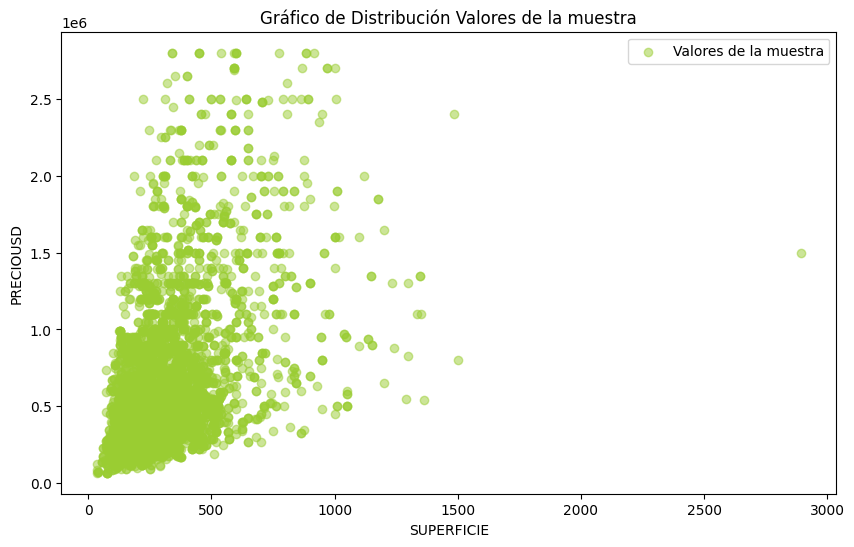

In [151]:
# Creamos el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(gdf1['SUPERFICIE'], gdf1['PRECIOUSD'], label='Valores de la muestra', color='yellowgreen', alpha=0.5)

# Configuramos etiquetas de ejes y leyenda
plt.xlabel('SUPERFICIE')
plt.ylabel('PRECIOUSD')
plt.legend(loc='best')

# Agregamos un título al gráfico
plt.title('Gráfico de Distribución Valores de la muestra')

Vemos que hay un outlier cuyo precio es 1500000 USD aproximadamente y tiene alrededor de 28002m².

Entendemos que considerando solamente estas 2 dimensiones, esto puede parecer llamativo, pero no se justifica su eliminación, ya que otras variables no representadas podrían explicar esta relación superficie/precio.

Definimos
- variable a expliar (Y)
- variable explicativa (X)
- constante

In [152]:

# Definimos variable a explicar (Y) y variable explicativa (X)
Y=gdf1.PRECIOUSD
X=gdf1.SUPERFICIE

#Definimos una constante con sm
X=sm.add_constant(X)
X

,const,SUPERFICIE
0,1.0,211
1,1.0,348
2,1.0,320
3,1.0,250
4,1.0,150
...,...,...
4903,1.0,563
4904,1.0,176
4905,1.0,149
4906,1.0,771


**1.Estimamos el modelo:**

  Usando el método OLS, asignamos un nombre al modelo (modelo1) y especificamos las variables en cuestion.
  
  Luego ejecutamos y observamos los resultados imprimiendolos para facilitar su visualización:

In [153]:
modelo1=sm.OLS(Y,X)
resultados1=modelo1.fit()
print(resultados1.summary())

                            OLS Regression Results                            
Dep. Variable:              PRECIOUSD   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     1398.
Date:                Fri, 15 Sep 2023   Prob (F-statistic):          2.00e-269
Time:                        03:49:22   Log-Likelihood:                -70467.
No. Observations:                4908   AIC:                         1.409e+05
Df Residuals:                    4906   BIC:                         1.410e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.746e+05   1.19e+04     23.021      0.0

**2.Valores β₀ y β₁:**

Por lo que podemos observar, la constante (β₀) equivale a 274.600, mientras que el valor del coeficiente β₁ es 1237,05.

En ambos casos, el pvalor es 0,000 por lo que podemos asumir que los datos son estadísticamente significativos para cualquier nivel de significatividad (1%, 5% o 10%).

A modo de prueba, calculamos manualmente el precio de un lote de 802m² utilizando los coeficientes resultantes de nuestra regresión:

In [154]:
# Lote de 80m2
274600+1237.05*80

373564.0

Hacemos lo mismo, evitando escribir lo coeficientes a mano:

In [155]:
# Lote de 80m2
resultados1.params['const']+resultados1.params['SUPERFICIE']*80

373526.20446782676

Ejecutamos la siguiente fución para ver todos los resultados de la predicción:

In [156]:
# Predicciones para observaciones en la data
resultados1.params['const']+resultados1.params['SUPERFICIE']*gdf1.SUPERFICIE

0       5.355801e+05
1       7.050563e+05
2       6.704188e+05
3       5.838251e+05
4       4.601199e+05
            ...     
4903    9.710225e+05
4904    4.922832e+05
4905    4.588828e+05
4906    1.228329e+06
4907    7.805165e+05
Name: SUPERFICIE, Length: 4908, dtype: float64

In [157]:
#Ahora predecimos los resultados.
predicciones1=resultados1.predict(X)
predicciones1

0       5.355801e+05
1       7.050563e+05
2       6.704188e+05
3       5.838251e+05
4       4.601199e+05
            ...     
4903    9.710225e+05
4904    4.922832e+05
4905    4.588828e+05
4906    1.228329e+06
4907    7.805165e+05
Length: 4908, dtype: float64

Para ver nuestros resultados, graficamos las predicciones generadas a partir del modelo y las comparamos con los valores reales de la muestra:

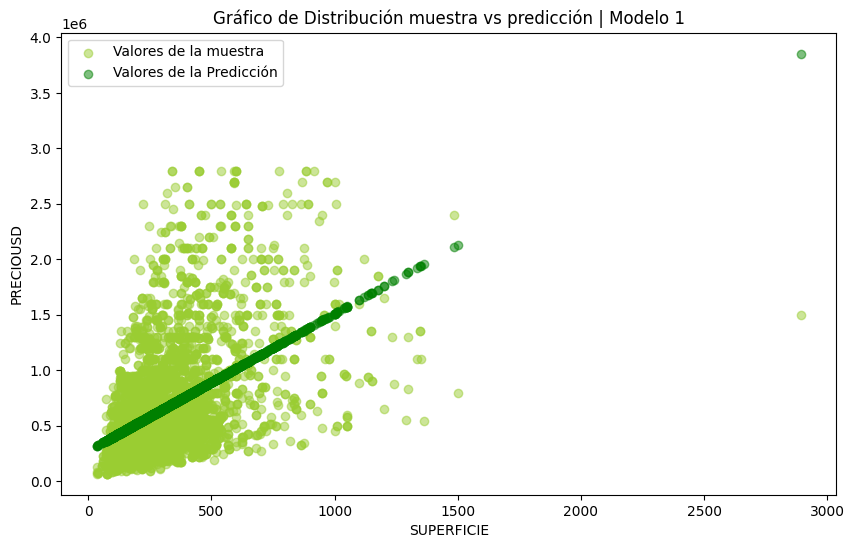

In [158]:
# Creamos el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(X['SUPERFICIE'], gdf1['PRECIOUSD'], label='Valores de la muestra', color='yellowgreen', alpha=0.5)
plt.scatter(X['SUPERFICIE'], predicciones1, label='Valores de la Predicción', color='green', alpha=0.5)

# Configuramos etiquetas de ejes y leyenda
plt.xlabel('SUPERFICIE')
plt.ylabel('PRECIOUSD')
plt.legend(loc='best')

# Agregamos un título al gráfico
plt.title('Gráfico de Distribución muestra vs predicción | Modelo 1')

# Guardamos el gráfico como un objeto
grafico_dispersion_modelo1 = plt.gcf()

# Mostramos el gráfico
plt.show()

La impresición del modelo 1 es claramente visible a partir de este gráfico. Si bien la tendencia no es totalmente errónea, ya se ve el error en la constante y la prendiente de la función.

**3.Test de hipótesis para comprobar si la superficie tiene un efecto en el valor de oferta de un terreno:**

Para comprobar si la superficie tiene un efecto en el valor del terreno, asumimos que el coeficiente β₁ calculado (que nos informa sobre los valores adicionales por cada m²  para estas propiedades) puede ser analizado con una función normal teniendo en cuenta su relación con su desvío estándar:

$T_\beta1=\beta1/\textit{std err}_\beta1$

Con los resultados obtenidos de correr el modelo, observamos que la T de β₁ es 37,904 y su P-valor es de 0,00.

En base a esto podemos concluír que se rechaza la hipótesis nula de β₁=0, ya que, considerando los valores de la muestra, la probabilidad de que esto ocurra es muy próxima a 0.

Afirmamos entonces que existe una relación estadísticamente significativa entre la variable explicativa SUPERFICIE y la variable a explicar PRECIO.


**4.Bondad de ajuste del modelo:**

Considerando lo antedicho, observamos ahora el R² para evaluar cuánta variabilidad capta nuestro modelo de la variabilidad total.

En la salida de la regresión vemos que R²=0,227.

Esto nos indica que con esta constante, esta variable y este error, estamos captando un 22% de la variabilidad; dejando un 78% fuera aproximadamente.

Entendemos que si bien el efecto de la superficie sobre el precio no es menor, este planteo es inuficiente para realizar buenas predicciones de la variable que queremos explicar.

Probamos tomando un intervalo de confianza del 99% y estos son los resultados:

In [159]:
# Ajustar el modelo con un intervalo de confianza del 99%
modelo1=sm.OLS(Y,X)
resultados1=modelo1.fit()
print(resultados1.summary(alpha=0.01))

                            OLS Regression Results                            
Dep. Variable:              PRECIOUSD   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     1398.
Date:                Fri, 15 Sep 2023   Prob (F-statistic):          2.00e-269
Time:                        03:49:22   Log-Likelihood:                -70467.
No. Observations:                4908   AIC:                         1.409e+05
Df Residuals:                    4906   BIC:                         1.410e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.005      0.995]
------------------------------------------------------------------------------
const       2.746e+05   1.19e+04     23.021      0.0

Observando los valores, corroboramos la variable explicativa sigue siendo significativa aun con esta exigencia mayor.



# Pregunta 2

Suponga el siguiente modelo alternativo para el valor de los terrenos (MODELO 2):

$$PrecioUSD_i=\beta_0+\beta_1\textit{Superficie}_i+\beta_2\textit{uni_edif_1}_i+\epsilon_i$$

Donde *uni_edif_1* es la altura maxima que puede construirse en el terreno *i*.

1. Estime el modelo. Interprete los coeficientes estimados.

2. Interprete el valor de  $\hat{\beta_0}$, $\hat{\beta_1}$ y de  $\hat{\beta_2}$. En particular, discuta si la interpretación de $\hat{\beta_1}$ es similar (o no) a la realizada en el caso del MODELO1.

3. Identifique en qué medida el MODELO 2 provee una mejor explicación a los precios de los terrenos.

# MODELO 2

**1. Estimación de un modelo multivariado:**

$$PrecioUSD_i=\beta_0+\beta_1\textit{Superficie}_i+\beta_2\textit{uni_edif_1}_i+\epsilon_i$$


Tomamos el modelo 1 y le sumamos una variable explicativa más (β₂) que incorpora el efecto de la edificabilidad del lote para estimar el precio.

El coeficiente β₂ indicará entonces en cuánto aumenta o disminuye el precio según la altura máxima construíble en el terreno.

Retomamos la base de datos original y traemos la variable adicional que necesitamos para este modelo:


In [160]:
gdf2=gdf[['SUPERFICIE', 'PRECIOUSD','uni_edif_1']]
#gdf2 = gdf2.sort_values(by='uni_edif_1', ascending=True)
#gdf2 = gdf2.loc[(gdf2.uni_edif_1>0)]
gdf2

,SUPERFICIE,PRECIOUSD,uni_edif_1
0,211,265000,22.8
1,348,590000,22.8
2,320,300000,17.2
3,250,305000,17.2
4,150,320000,17.2
...,...,...,...
4903,563,1390000,17.2
4904,176,399000,17.2
4905,149,430000,22.8
4906,771,690000,0.0


Definimos la función regress para simplificar la construcción las regresiones:

In [161]:
def regress(lista, data):
  """
  Funcion que realiza la regresion OLS
  La primera variable de la lista es la dependiente, el resto son las explicativas
  data es la base de datos
  """
  datos=data[lista]
  # el metodo dropna() me permite eliminar las filas que tienen algun valor missing
  datos=datos.dropna()
  Y=datos[lista[0]]
  X=datos[lista[1:]]
  X=sm.add_constant(X)
  modelo=sm.OLS(Y,X)
  resultados=modelo.fit()
  print(resultados.summary())
  return resultados,X


1.Definimos cual es la variable a explicar y las explicativas y construímos el modelo:

In [162]:
resultados2,X2 = regress(['PRECIOUSD', 'SUPERFICIE','uni_edif_1'], gdf2)

                            OLS Regression Results                            
Dep. Variable:              PRECIOUSD   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     956.8
Date:                Fri, 15 Sep 2023   Prob (F-statistic):               0.00
Time:                        03:49:22   Log-Likelihood:                -70274.
No. Observations:                4908   AIC:                         1.406e+05
Df Residuals:                    4905   BIC:                         1.406e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.023e+05   1.43e+04      7.140      0.0

**2.Interpretación de los resultados.**

En función del modelo multivariado construido, identificamos una serie de cambios que resultan de interés para analizar los resultados obtenidos:
- En primer lugar, el β₀ (constante del modelo) se modifica en forma considerable, dado que disminuye a más de un 60% respecto al valor del Modelo 1 (de más de USD274.000 a USD102.000).
- En cuanto al coeficiente de β₁ ('SUPERFICIE'), el mismo sufre una leve variación, nada comparable a la del β₀. El cambio fue de USD1.237 a USD1.1182, lo que implica una variación menor al 5%.
- En relación al coeficiente de β₂ ('uni_edif_1'), el mismo adquiere un valor de USD11.900. En función de esto es posible interpretar que por cada metro adicional de altura máxima permitida, el valor del terreno aumenta, en promedio, USD11.900, lo que resulta lógico entendiendo que el valor del suelo se construye, entre otras cosas, por su potencial constructivo, que depende en gran medida de la altura máxima construible.

**3. Explicación de los precios del terreno por el MODELO 2 en relación al MODELO 1**

El MODELO 2 provee una mejor explicación a los precios de los terrenos, ya que incorporando esta variable, R² aumenta en 6 puntos porcentuales aproximadamente.

Con este valor, podemos afirmar que el nuevo modelo mejora la predicción captando un porcentaje mayor de la variabilidad total (0,22 en el modelo 1; 0,28 en el modelo 2)

Hasta este punto del proceso teníamos dudas acerca del coeficiente β₀ ya que nos parecía muy elevado; sin embargo, a la luz de estos datos, es lógico considerar que el valor base de los lotes en CABA estuviera dando esos valores, ya que el peso de la edificabilidad es muy alto sobre el precio de los mismos, y al no ser explicado en el primer modelo mediante la variable β₁, la constante absorbía esa diferencia.


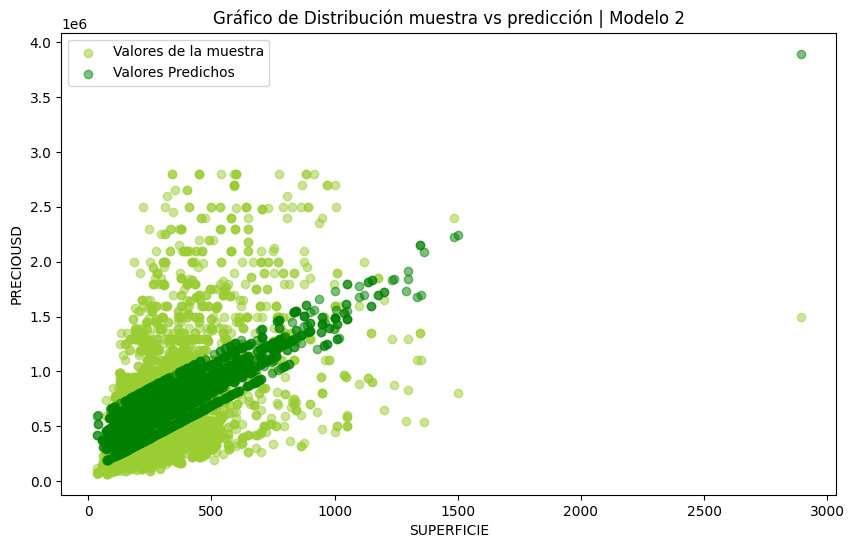

In [163]:
#Calculamos las predicciones
predicciones2 = resultados2.predict()

# Creamos el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(X2['SUPERFICIE'], gdf2['PRECIOUSD'], label='Valores de la muestra', color='yellowgreen', alpha=0.5)
plt.scatter(X2['SUPERFICIE'], predicciones2, label='Valores Predichos', color='green', alpha=0.5)

# Configuramos etiquetas de ejes y leyenda
plt.xlabel('SUPERFICIE')
plt.ylabel('PRECIOUSD')
plt.legend(loc='best')

# Agregamos un título al gráfico
plt.title('Gráfico de Distribución muestra vs predicción | Modelo 2')

# Guardamos el gráfico como un objeto
grafico_dispersion_modelo2sup = plt.gcf()

Como podemos ver, el gráfico devuelve múltiples funciones de regresión en lugar de una. Esto se da, debido a que al haber más de una variable explicativa, para predecir el impacto de una, se fijan las demás. Si quisieramos representarlo de otra manera, podría hacerse con una representación tridimensional para este caso en el que las variables explicativas son 2.

Si en lugar de graficar el precio en relación a la superficie, quisieramos verlo en relación a la unidad de edificabilidad dejando fija la superficie para cada categoría de esta variable, el gráfico resultante sería el siguiente:

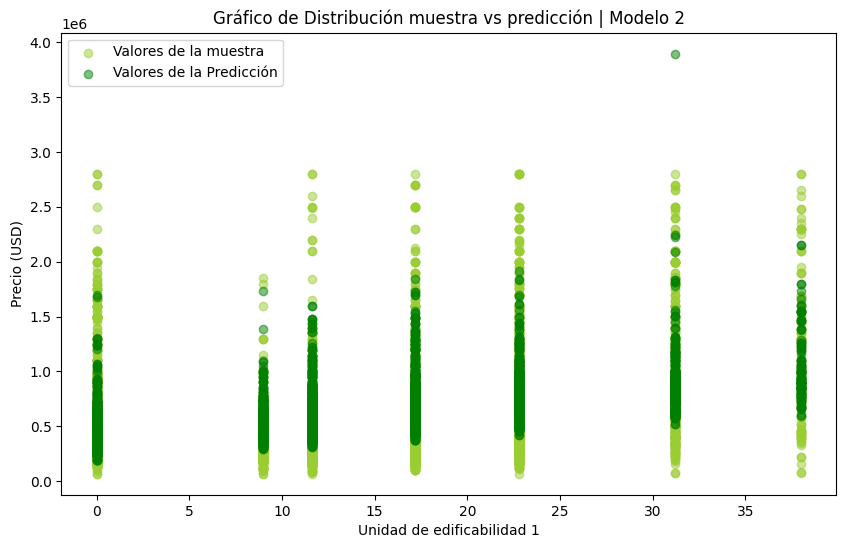

In [164]:
#Calculamos las predicciones
predicciones2 = resultados2.predict()

# Creamos el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(X2['uni_edif_1'], gdf2['PRECIOUSD'], label='Valores de la muestra', color='yellowgreen', alpha=0.5)
plt.scatter(X2['uni_edif_1'], predicciones2, label='Valores de la Predicción', color='green', alpha=0.5)

# Configuramos etiquetas de ejes y leyenda
plt.xlabel('Unidad de edificabilidad 1')
plt.ylabel('Precio (USD)')
plt.legend(loc='best')

# Agregamos un título al gráfico
plt.title('Gráfico de Distribución muestra vs predicción | Modelo 2')

# Guardamos el gráfico como un objeto
grafico_dispersion_modelo2uni_edif = plt.gcf()

Como podemos ver, la Unidad de edificabilidad 1 es una variable discreta con 7 categorías presentes en la muestra. Con esta información, volviendo al gráfico anterior, es posible distinguir que son esa misma cantidad, las rectas que representan los resultados de la regresión.
Como la superficie es una variable cuantitativa contínua con muchos resultados próximos, en este segundo gráfico es imposible distinguir las subdivisiones que genera su fijación.


##Respuesta 2.1 | Modelo con base de datos filtrada


Analizando la base de datos encontramos que en la variable uni_edif_1 hay valores iguales a 0, lo que nos llamó la atención considerando que en el código de edificación no encontramos una referencia a esto.

Entendiendo que la variable se define como "Unidad de edificabilidad 1: define la altura máxima aplicable a cada Unidad de la Ciudad de Buenos Aires", filtramos los valores igual a 0 y encontramos que los siguientes en orden ascendente son 9.0; valor mínimo que aparece en el documento consultado (https://buenosaires.gob.ar/sites/default/files/2023-03/2022.12.31_CU_Cuerpo%20Principal.pdf , página 131)

Con esta modificación, volvimos a correr la regresión para presentar resultados alternativos a las preguntas 2 y 3 (a continuación).



In [165]:
gdf2_1= gdf2.sort_values(by='uni_edif_1', ascending=True)
gdf2_1 = gdf2.loc[(gdf2.uni_edif_1>0)]
gdf2_1

,SUPERFICIE,PRECIOUSD,uni_edif_1
0,211,265000,22.8
1,348,590000,22.8
2,320,300000,17.2
3,250,305000,17.2
4,150,320000,17.2
...,...,...,...
4902,269,435000,31.2
4903,563,1390000,17.2
4904,176,399000,17.2
4905,149,430000,22.8


In [166]:
resultados2_1,X2_1 = regress(['PRECIOUSD', 'SUPERFICIE','uni_edif_1'], gdf2_1)

                            OLS Regression Results                            
Dep. Variable:              PRECIOUSD   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     988.6
Date:                Fri, 15 Sep 2023   Prob (F-statistic):               0.00
Time:                        03:49:23   Log-Likelihood:                -59200.
No. Observations:                4145   AIC:                         1.184e+05
Df Residuals:                    4142   BIC:                         1.184e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.532e+04   1.87e+04     -4.031      0.0

Analizando el modelo, nos llamó la atención la constante negativa, por lo que procedimos a graficar las predicciones para ver el impacto de la misma:

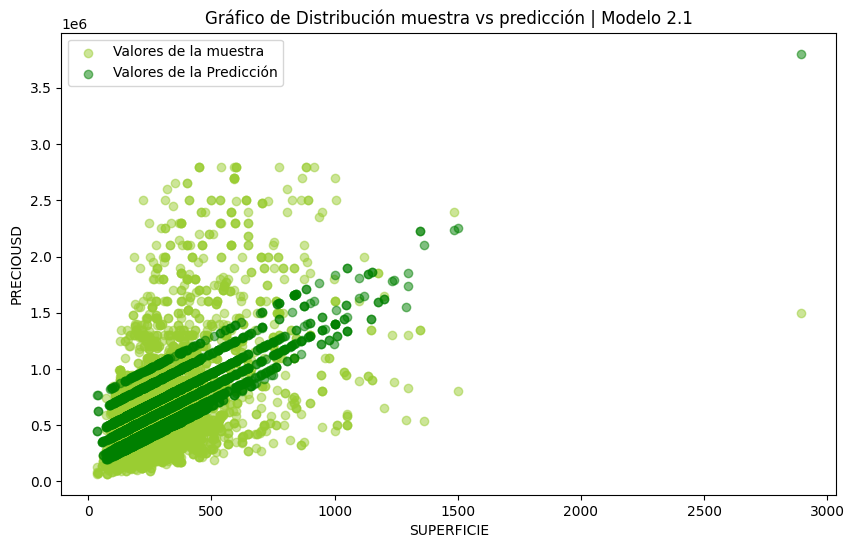

In [167]:
#Calculamos las predicciones
predicciones2_1 = resultados2_1.predict()

# Creamos el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(X2_1['SUPERFICIE'], gdf2_1['PRECIOUSD'], label='Valores de la muestra', color='yellowgreen', alpha=0.5)
plt.scatter(X2_1['SUPERFICIE'], predicciones2_1, label='Valores de la Predicción', color='green', alpha=0.5)

# Configuramos etiquetas de ejes y leyenda
plt.xlabel('SUPERFICIE')
plt.ylabel('PRECIOUSD')
plt.legend(loc='best')

# Agregamos un título al gráfico
plt.title('Gráfico de Distribución muestra vs predicción | Modelo 2.1')

# Guardamos el gráfico como un objeto
grafico_dispersion_modelo2_1 = plt.gcf()

Con esta representación que se ajusta mejor a la distribución de las observaciones de la muestra,  pensamos que el filtro aplicado a la base es pertinente (por la naturaleza del dato) y su impacto en la precisión de la estimación es positivo.

El nuevo modelo resulta en un R² de 0,32; mejorando la captación de la variabilidad en 4 puntos porcentuales con respecto a nuestro modelo 2 original.

# Pregunta 3
Considere el siguiente modelo (MODELO 3):

$$PrecioUSD_i=\beta_0+\beta_1\textit{0.8*Superficie*uni_edif_1}_i+\epsilon_i$$

Donde la medida $\textit{0.8*Superficie*uni_edif_1}$ es una aproximación a la superficie edificable en el terreno.

1. Proponga una método para estimar $\beta_1$
2. Provea una interpretación para  $\hat{\beta_1}$.
3. Identifique en qué medida el MODELO 3 provee un mejor ajuste de los datos que el MODELO 2.

# MODELO 3

**1.Método para estimar $\beta_1$**

Para poder construir el MODELO 3, creamos una variable adicional, "sup_edif", donde calculamos la superficie edificable del terreno multiplicando las variables "SUPERFICIE" y "uni_edif_1" por 0,8*:

*Nota aclaratoria: trabajamos sobre la base filtrada en el punto 2.1.

In [168]:
gdf3 = gdf2_1
gdf3['sup_edif'] = gdf3['SUPERFICIE'] * gdf3['uni_edif_1'] * 0.8
gdf3

<ipython-input-168-3845327bf8d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf3['sup_edif'] = gdf3['SUPERFICIE'] * gdf3['uni_edif_1'] * 0.8


,SUPERFICIE,PRECIOUSD,uni_edif_1,sup_edif
0,211,265000,22.8,3848.64
1,348,590000,22.8,6347.52
2,320,300000,17.2,4403.20
3,250,305000,17.2,3440.00
4,150,320000,17.2,2064.00
...,...,...,...,...
4902,269,435000,31.2,6714.24
4903,563,1390000,17.2,7746.88
4904,176,399000,17.2,2421.76
4905,149,430000,22.8,2717.76


Ejecutamos la regresión:

In [169]:
resultados3,X3 = regress(['PRECIOUSD', 'sup_edif'], gdf3)


                            OLS Regression Results                            
Dep. Variable:              PRECIOUSD   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     1668.
Date:                Fri, 15 Sep 2023   Prob (F-statistic):          9.90e-307
Time:                        03:49:24   Log-Likelihood:                -59308.
No. Observations:                4145   AIC:                         1.186e+05
Df Residuals:                    4143   BIC:                         1.186e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.655e+05   9720.971     37.598      0.0

**2.Interpretación del coeficiente β₁:**

Vemos que por cada m² construíble en cada lote, la regresión nos indica que se suman 63,45 USD. Vemos que en relación al β₁ del MODELO 2, este valor es mucho menor. Esto se debe claramente a la relación precio-densidad.

El estadístico t de β₁ en este caso es 40,8 versus el 33,5 y el 26,04 de β₁ y β₂ en el modelo anterior.

En base a esto, podemos afirmar que el β₁ del MODELO 3 presenta un error estándar relativo menor que β₁ y β₂ del modelo 2, captando mejor la variabilidad. En función de esto, β₁ del MODELO 3 se constituye como estimador más preciso y significativo que los coeficientes del MODELO 2.


**3.Comparación modelos**

Comparando los resultados de los Modelos 2 y 3, observamos algunas diferencias que resultan fundamentales. Primero, repasaremos los valores de cada Modelo que más relevantes nos resultan para esta comparación.

*Modelo 2.2:*

R²: 0.323 \
R² ajustado: 0.323 \
AIC: 1.184e+05 \
BIC: 1.184e+05 \

*Modelo 3:*

R²: 0.287 \
R² ajustado: 0.287 \
AIC: 1.186e+05 \
BIC: 1.186e+05

Comparando el R² (coeficiente de determinación), podemos ver que el Modelo 2 tiene un valor más alto que el Modelo 3. Esto indica que el Modelo 2 explica una mayor proporción de la variabilidad en la variable dependiente ("PRECIOUSD") en comparación con el Modelo 3. Por lo tanto, en términos de la capacidad del modelo para explicar la variabilidad en los datos observados, el Modelo 2 parece ser más efectivo.

En cuanto al AIC (Criterio de Información de Akaike) y el BIC (Criterio de Información Bayesiano), ambos indicadores son más bajos en el Modelo 2 que en el Modelo 3. En términos generales, un valor menor de AIC y BIC sugiere un mejor ajuste del modelo.

Sin embargo, es posible ver algunas bondades de ajuste en favor del Modelo 3:

*Modelo 2:*

SUPERFICIE: Estadístico t = 33.556 \
uni_edif_1: Estadístico t = 26.047

*Modelo 3:*

sup_edif: Estadístico t = 40.840

Estos valores t indican que todas las variables en ambos modelos son altamente significativas estadísticamente. Sin embargo, la variable "sup_edif" en el Modelo 3 tiene el valor t más alto, lo que sugiere que es especialmente significativa en la predicción de la variable dependiente.

**En conclusión:**

Nos preguntamos por qué el Modelo 3 podría ser considerado mejor que el Modelo 2, a pesar de tener un R² ligeramente inferior y AIC/BIC ligeramente mayores que el Modelo 2.  Encontramos que hay una razón principal, vinculada a la pertinencia del modelo en términos teóricos.

La variable "sup_edif" en el Modelo 3 parece tener una mayor relevancia en el contexto específico de la variable que se pretende explicar, dado que la combinación de altura permitida y superficie brinda mayor información sobre el precio del inmueble que los datos de superficie o altura desvinculados, dado que este se basa, entre otras cosas, en su capacidad constructiva.

Consideramos además, en favor del Modelo 3, el valor de su constante.

*Modelo 2:*
media: 672838
constante: -75320

*Modelo 3:*
media: 672838
constante: 365550

En su contexto específico (modelo que pretende explicar el precio de un terreno en función de variables cuyos valores extrañanamente puedan adquirir valor "0"), destacamos que la constante negativa del Modelo 2 puede interpretarse como un ajuste del precio base que tiene en cuenta factores no incluidos en el modelo (como ubicación o características generales del terreno).

Entendemos entonces que el Modelo 3 presenta mayores bondades dado que parte de una constante cuyo valor es positivo y es más próximo a la media del valor de las propiedades contenidas en la muestra, por lo que no está absorbiendo tantas deficienciencias/omisiones generales del modelo, como sucede en el caso 2.

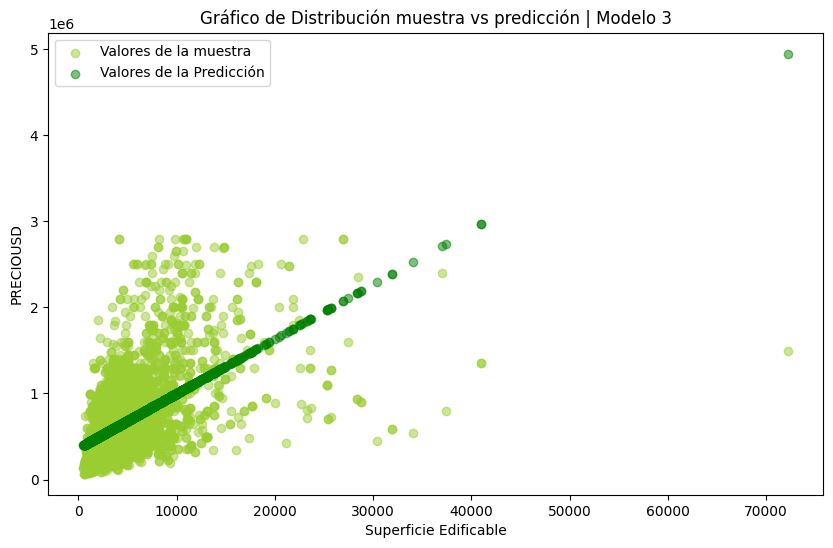

In [170]:
#Calculamos las predicciones
predicciones3 = resultados3.predict()

# Creamos el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(X3['sup_edif'], gdf3['PRECIOUSD'], label='Valores de la muestra', color='yellowgreen', alpha=0.5)
plt.scatter(X3['sup_edif'], predicciones3, label='Valores de la Predicción', color='green', alpha=0.5)

# Configuramos etiquetas de ejes y leyenda
plt.xlabel('Superficie Edificable')
plt.ylabel('PRECIOUSD')
plt.legend(loc='best')

# Agregamos un título al gráfico
plt.title('Gráfico de Distribución muestra vs predicción | Modelo 3')

# Guardamos el gráfico como un objeto
grafico_dispersion_modelo3 = plt.gcf()

# Pregunta 4

1.  Analice graficamente el cumplimiento del supuesto normalidad de los errores utilizando los resultados de la estimación de  regresión.
  *Nota:* Puede realizar este análisis en base a cualquiera de los 3 MODELOS estimados. Elija el que prefiera
  

2. ¿Pueden considerarse válido un test de hipótesis como el realizado en el punto 1.3 en este caso particular? ¿Por qué sí o por qué no?



# 4 | ANÁLISIS DEL ERROR

**1. Análisis gráfico del cumplimiento del supuesto de normalidad de los errores. **

Calculamos los residuos del Modelo 1 de los resultados de nuestra regresión y graficamos sus valores:

<Axes: >

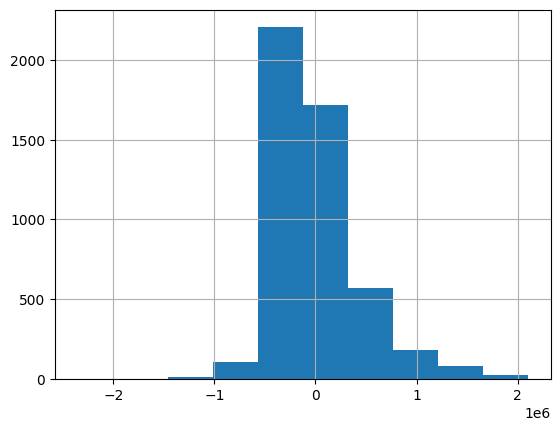

In [171]:
#resultados.mse_resid
ypred = resultados1.predict()
residuos=Y-ypred
residuos.hist()

Vemos que la distribución es casi normal con la mayoría de las observaciones agrupadas entre -1 y 1.


Sumamos una variable para registrar los residuos de cada observación:

In [172]:
gdf3['residuos']=residuos
gdf3

<ipython-input-172-b4cbb32e515e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf3['residuos']=residuos


,SUPERFICIE,PRECIOUSD,uni_edif_1,sup_edif,residuos
0,211,265000,22.8,3848.64,-270580.074300
1,348,590000,22.8,6347.52,-115056.258781
2,320,300000,17.2,4403.20,-370418.790420
3,250,305000,17.2,3440.00,-278825.119517
4,150,320000,17.2,2064.00,-140119.875370
...,...,...,...,...,...
4902,269,435000,31.2,6714.24,-172329.115905
4903,563,1390000,17.2,7746.88,418977.466304
4904,176,399000,17.2,2421.76,-93283.238849
4905,149,430000,22.8,2717.76,-28882.822929


Ahora realizamos un gráfico de probabilidad normal (QQ plot) y un histograma de los residuos, ambos útiles para evaluar si los residuos del Modelo 1 siguen una distribución normal.

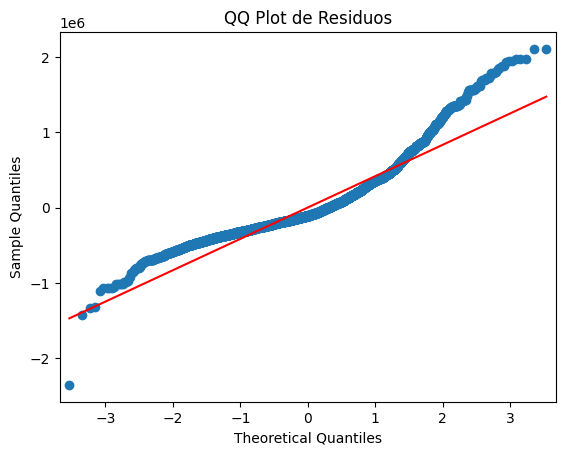

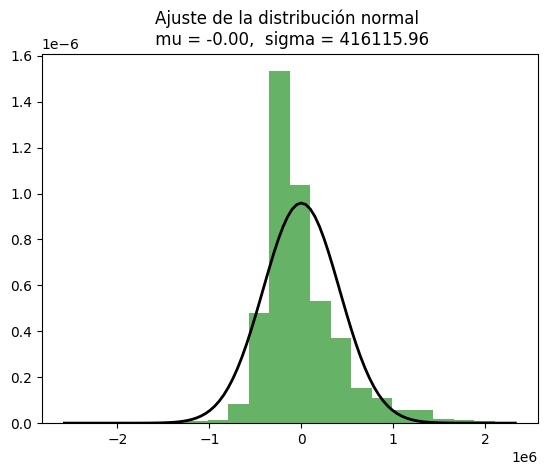

In [173]:
from scipy import stats
# Gráfico de probabilidad normal (QQ plot)
sm.qqplot(residuos, line='s')
plt.title('QQ Plot de Residuos')
plt.show()

# Histograma de los residuos
plt.hist(residuos, bins=20, density=True, alpha=0.6, color='g')
# Añadir una curva de densidad normal teórica para comparación
mu, sigma = stats.norm.fit(residuos)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
title = "Ajuste de la distribución normal \n mu = %.2f,  sigma = %.2f" % (mu, sigma)
plt.title(title)
plt.show()

En base a lo observado en los gráficos generados, pudimos corroborar que hay normalidad en la distribución de los errores.


*   En el caso del QQ plot, se compara los cuantiles de nuestros datos con los de una distribución de referencia (generalmente normal). Dado que los puntos se encuentran distribuidos muy cerca de la línea diagonal, podemos afirmar que los datos siguen una distribución similar a la de referencia.
*   En el caso del histograma, vemos que la distribución sigue la forma de una campana invertida, lo que nos indica normalidad en la distribución de los errores.

# Pregunta 5
1. Usando los datos disponibles, proponga un modelo para analizar el efecto de la incorporación de la localización como variable explicativa del precio de los terrenos. Ayuda: Puede utilizar la comuna o el barrio. ¿En qué medida  la localización es relevante para explicar los precios de los terrenos?
2. Proponga un test para identificar si los terrenos ubicados en la Comuna 5  (Almagro, Boedo) presentan menor valor que los de la Comuna 1 (Retiro, San Nicolás). Explique los resultados.

# MODELO 5

**1.Desarrollo del modelo para definir relevancia de la localización en la explicación de los precios de los modelos**

Analizamos en qué medida la localización es relevante para explicar los precios de los terrenos. Entendemos que la pertenencia de un lote a una comuna (1=pertenece, 0=no pertenece) tendrá una implicancia sobre su precio.

Para poder hacer la regresión, filtramos la base original y traemos con las anteriores, la variable barrios.

Como queremos incorporar también el efecto de la superficie edificable, recreamos ese campo:


In [174]:
gdf5= gdf.loc[(gdf.uni_edif_1>0)]
gdf5 = gdf5[['SUPERFICIE', 'PRECIOUSD','uni_edif_1','COMUNA_','BARRIO']]
gdf5['sup_edif'] = gdf5['SUPERFICIE'] * gdf5['uni_edif_1'] * 0.8
gdf5

,SUPERFICIE,PRECIOUSD,uni_edif_1,COMUNA_,BARRIO,sup_edif
0,211,265000,22.8,5,ALMAGRO,3848.64
1,348,590000,22.8,5,ALMAGRO,6347.52
2,320,300000,17.2,5,ALMAGRO,4403.20
3,250,305000,17.2,5,ALMAGRO,3440.00
4,150,320000,17.2,5,ALMAGRO,2064.00
...,...,...,...,...,...,...
4902,269,435000,31.2,7,FLORES NORTE,6714.24
4903,563,1390000,17.2,7,FLORES NORTE,7746.88
4904,176,399000,17.2,7,FLORES NORTE,2421.76
4905,149,430000,22.8,7,FLORES NORTE,2717.76


Definimos entonces las variables binarias para cada comuna y las incorporamos como explicativas en nuestra función:

In [175]:
comunas = gdf5['COMUNA_'].unique()
for comuna in comunas:
    gdf5[f'{comuna}_pertenece'] = (gdf5['COMUNA_'] == comuna).astype(int)

# Definir las variables dependientes e independientes
Y = gdf5['PRECIOUSD']
X = gdf5[['sup_edif'] + [f'{comuna}_pertenece' for comuna in comunas]]

X = sm.add_constant(X)  # Agregar la constante

# Realizar la regresión
modelo = sm.OLS(Y, X)
resultados5 = modelo.fit()

# Imprimir el resumen del modelo
print(resultados5.summary())

                            OLS Regression Results                            
Dep. Variable:              PRECIOUSD   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     213.2
Date:                Fri, 15 Sep 2023   Prob (F-statistic):               0.00
Time:                        03:49:27   Log-Likelihood:                -58820.
No. Observations:                4145   AIC:                         1.177e+05
Df Residuals:                    4129   BIC:                         1.178e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.499e+05   9864.110     35.468   

Analizando los resultado de la regresión, vemos, en primer lugar, que el R² es de 0,437; valor que es superior a los de los modelos anteriores. Podemos decir entonces que incorporando los factores localización y superficie edificable, logramos captar un 43% de la variabilidad. Si observamos el modelo 3, este explicaba casi un 29%, lo que nos permite afirmar que con esta adición, aumentamos unos 14 puntos porcentuales.

En lo que respecta a los coeficientes:

**β₀/constante:** Disminuye de USD365500 a USD349900, valor que tiene sentido y nos indica que el efecto se está distribuyendo entre otras variables explicativas. Su p-valor sigue siendo 0, por lo que la consideramos significativa.

**β₁/superficie edificable:** Se mantiene prácticamente igual, pasando de 63,45 a 63,96 USD por cada m² construible adicional. Su p-valor sigue siendo 0, por lo que la consideramos significativa.

**β₂...k/comunas de pertenencia:** Como esperabamos, entre estos coeficientes vemos gran variabilidad, algunos potencialmente generando un efecto positivo y otros uno negativo sobre el total.

Lógicamente vemos cómo las comunas que agrupan un mayor nivel socioeconomico y mayores oportunidades urbanas, tienen coficientes positivos más elevados en general.

Sin embargo, por ser una unidad territorial muy amplia, hay comunas que engloban situaciones urbanas muy heterogéneas.

Pensamos que por esta razón algunos coeficientes no son significativos, ya que no tienen la capacidad de captar estos resultados tan diversos.

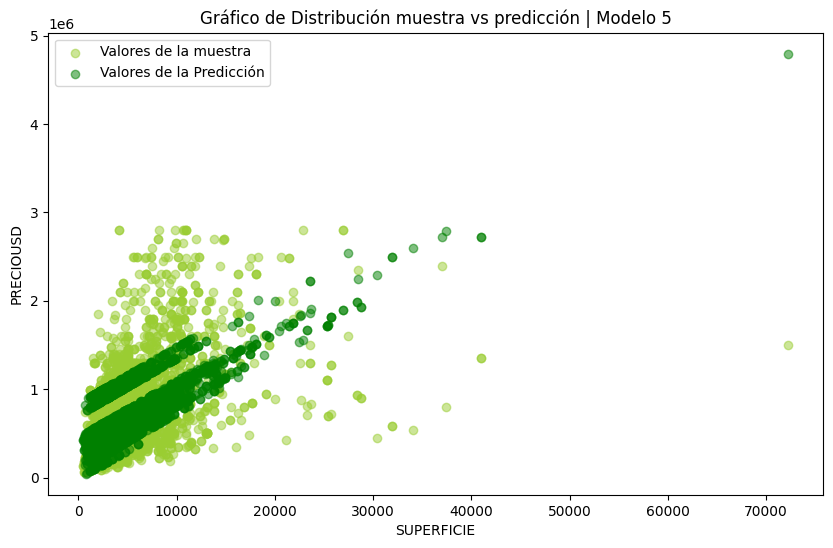

In [176]:
#Calculamos las predicciones
predicciones5 = resultados5.predict()

# Creamos el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(X['sup_edif'], gdf5['PRECIOUSD'], label='Valores de la muestra', color='yellowgreen', alpha=0.5)
plt.scatter(X['sup_edif'], predicciones5, label='Valores de la Predicción', color='green', alpha=0.5)

# Configuramos etiquetas de ejes y leyenda
plt.xlabel('SUPERFICIE')
plt.ylabel('PRECIOUSD')
plt.legend(loc='best')

# Agregamos un título al gráfico
plt.title('Gráfico de Distribución muestra vs predicción | Modelo 5')

# Guardamos el gráfico como un objeto
grafico_dispersion_modelo5 = plt.gcf()

## Respuesta 5.1 | Modelo Alternativo
Para poner a prueba esta teoría, podemos ver qué sucede con los valores de los errores en este modelo en comparación con los resultantes de un modelo alternativo que en lugar de contemplar variables por pertenencia a comunas, lo hace por barrios.

Para esto, calculamos el error cuadrático medo del modelo en base a comunas y observamos su raíz cuadrada:

In [177]:
MSE=resultados5.mse_resid
MSE**0.5


352776.6962268789

Luego calculamos los residuos de cada observación:

In [178]:
ypred = resultados5.predict(X)
residuos5=Y-ypred

Después generamos el modelo con variables por barrio y calculamos también la raís cuadrada de su MSE y el error de sus observaciones:

In [179]:
barrios = gdf5['BARRIO'].unique()
for barrio in barrios:
    gdf5[f'{barrio}_pertenece'] = (gdf5['BARRIO'] == barrio).astype(int)

# Definir las variables dependientes e independientes
Y = gdf5['PRECIOUSD']
X = gdf5[['sup_edif'] + [f'{barrio}_pertenece' for barrio in barrios]]

X = sm.add_constant(X)  # Agregar la constante

# Realizar la regresión
modelo = sm.OLS(Y, X)
resultados5_1 = modelo.fit()

# Imprimir el resumen del modelo
print(resultados5_1.summary())


                            OLS Regression Results                            
Dep. Variable:              PRECIOUSD   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     74.05
Date:                Fri, 15 Sep 2023   Prob (F-statistic):               0.00
Time:                        03:49:27   Log-Likelihood:                -58714.
No. Observations:                4145   AIC:                         1.175e+05
Df Residuals:                    4096   BIC:                         1.178e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

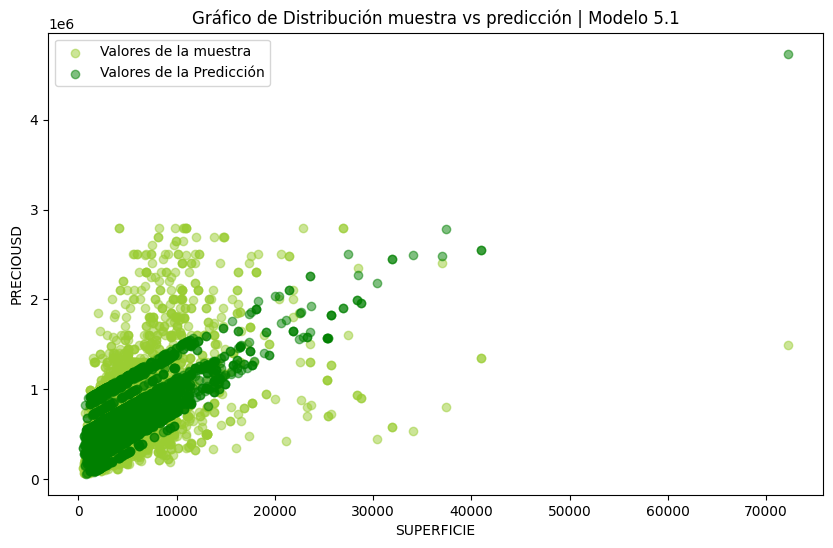

In [180]:
#Calculamos las predicciones
predicciones5_1 = resultados5_1.predict()

# Creamos el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(X['sup_edif'], gdf5['PRECIOUSD'], label='Valores de la muestra', color='yellowgreen', alpha=0.5)
plt.scatter(X['sup_edif'], predicciones5_1, label='Valores de la Predicción', color='green', alpha=0.5)

# Configuramos etiquetas de ejes y leyenda
plt.xlabel('SUPERFICIE')
plt.ylabel('PRECIOUSD')
plt.legend(loc='best')

# Agregamos un título al gráfico
plt.title('Gráfico de Distribución muestra vs predicción | Modelo 5.1')

# Guardamos el gráfico como un objeto
grafico_dispersion_modelo5_1 = plt.gcf()

In [181]:
#MSE
MSE=resultados5_1.mse_resid
MSE**0.5

345253.83834400546

In [182]:
#resultados.mse_resid
ypred = resultados5_1.predict(X)
residuos5_1=Y-ypred

Finalmente, observamos ambos resultados a la par:

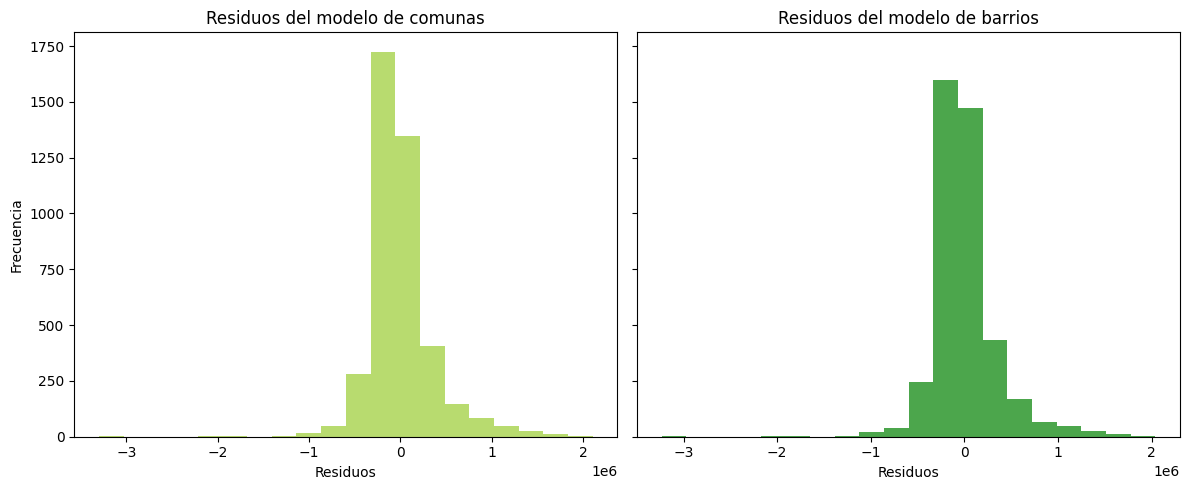

In [183]:
import matplotlib.pyplot as plt

# Crear una figura con dos subplots en una fila
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)  # Compartir el eje y

# Histograma de residuos del modelo de comunas
axs[0].hist(residuos5, bins=20, color='yellowgreen', alpha=0.7)
axs[0].set_title('Residuos del modelo de comunas')
axs[0].set_xlabel('Residuos')
axs[0].set_ylabel('Frecuencia')

# Histograma de residuos del modelo de barrios
axs[1].hist(residuos5_1, bins=20, color='green', alpha=0.7)
axs[1].set_title('Residuos del modelo de barrios')
axs[1].set_xlabel('Residuos')

# Eliminar el ylabel del segundo subplot
axs[1].set_ylabel('')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

En primer lugar, la RMSE nos da 352776.69 en el primer caso y 345253.83 en el segundo; una diferencia considerable que nos indica un mejor ajuste del modelo a los datos.

Podemos observar que en el modelo que toma la pertenencia a barrios como variables, los errores tienen una función más normal y disminuyen.

Para poder decir en qué medida la incorporación de estas variables mejora la predicción, además de mirar las RMSE, observamos el progreso realizado hasta este punto en términos de R²:

Modelo 1: 0.222 \
Modelo 2: 0.281 \
Modelo 2_1: 0.323 \
Modelo 3: 0.287 \
Modelo 5_comunas:0.437 \
Modelo 5_barrios: 0.465

Podemos decir entonces que desde el primer modelo, agregando variables explicativas hemos aumentado la captación de la variabilidad en 24 puntos porcentuales aproximadamente.

**2. Comparación de valores entre la Comuna 5 y Comuna 1**

Para identificar si los terrenos ubicados en la Comuna 5 (Almagro, Boedo) presentan menor valor que los de la Comuna 1 (Retiro, San Nicolás) realizamos un análisis que parte, primero, de revisar los resultados particulares del modelo de regresión utilizado para responder esta pregunta.

El p-valor de la Comuna 1 es 0.951, lo que nos impide rechazar la hipótesis nula de que la localización en la Comuna 1 no ejerce efectos en el valor del precio del suelo. Además, hace que el valor arrojado por el modelo (USD1173) no sea estadísticamente significativo. En cambio, la Comuna 5 presenta un p-valor de 0.034, lo que nos permite afirmar que la localización en dicha Comuna ejerce un efecto sobre el valor del precio del suelo. En este sentido, en primer lugar, podemos considerar que el efecto de incrementar el valor del suelo por localización en la Comuna 5 estimado en USD42.670 es estadísticamente significativo.

En función de esto, no se puede afirmar que los terrenos son más baratos por la localización en una u otra comuna sin realizar un test de hipótesis. Para comparar si los precios de la Comuna 5 son significativamente menores que los de la Comuna 1 realizaremos un test de hipótesis para comparar las medias de dos grupos.

La hipótesis nula (H0) sería que no la Comuna 5 tiene precios iguales o mayores que la Comuna 1. La hipótesis alternativa (H1) sería que los precios de Comuna 5 son menores que los de Comuna 1.

Para llevar a cabo este test, sigue estos pasos:

**1. Formulación de Hipótesis:**

H0 (Hipótesis Nula): La media de Comuna 5 (5_pertenece) es igual o mayor que la media de Comuna 1 (1_pertenece).
H0: μ5 ≥ μ1
H1 (Hipótesis Alternativa): La media de Comuna 5 (5_pertenece) es menor que la media de Comuna 1 (1_pertenece).
H1: μ5 < μ1

**2. Fijamos un nivel de significatividad**. En este caso, será en 0,05 (α = 0.05).



In [184]:
# Datos de los precios de Comuna 5 y Comuna 1
precios_comuna5 = gdf5[gdf5['COMUNA_'] == 5]['PRECIOUSD']
precios_comuna1 = gdf5[gdf5['COMUNA_'] == 1]['PRECIOUSD']
import scipy.stats as stats

In [185]:
#Realizamos el test de hipótesis
statistic, p_value = stats.ttest_ind(precios_comuna5, precios_comuna1, alternative='less') #El ttest nos ayuda a hacer el test de diferencia de medias.

# Nivel de significatividad (alpha)
alpha = 0.05

# Comparar el p-valor con el nivel de significación
if p_value <= alpha:
    print(f"Rechazamos la hipótesis nula. Hay evidencia para sugerir que los precios de la Comuna 5 son menores que los de la Comuna 1.")
else:
    print(f"No podemos rechazar la hipótesis nula. No hay suficiente evidencia para sugerir que los precios de la Comuna 5 son menores que los de la Comuna 1.")

Rechazamos la hipótesis nula. Hay evidencia para sugerir que los precios de la Comuna 5 son menores que los de la Comuna 1.


En función de los resultados de nuestro test, para un nivel de significatividad de 0.05, es posible rechazar la hipótesis nula (H0), por lo que hay evidencia para sugerir que los precios de la Comuna 5 son menores que los de la Comuna 1. Por último, lo haremos para un nivel de significatividad aún mayor (0.01).

In [186]:
#Realizamos el test de hipótesis
statistic, p_value = stats.ttest_ind(precios_comuna5, precios_comuna1, alternative='less')

# Nivel de significatividad (alpha)
alpha_02 = 0.01

# Comparar el p-valor con el nivel de significación
if p_value <= alpha_02:
    print(f"Rechazamos la hipótesis nula. Hay evidencia para sugerir que los precios de la Comuna 5 son menores que los de la Comuna 1.")
else:
    print(f"No podemos rechazar la hipótesis nula. No hay suficiente evidencia para sugerir que los precios de la Comuna 5 son menores que los de la Comuna 1.")

No podemos rechazar la hipótesis nula. No hay suficiente evidencia para sugerir que los precios de la Comuna 5 son menores que los de la Comuna 1.


Cambiando el nivel de significatividad, no es posible rechazar la hipótesis nula y sugerir que los precios de la Comuna 5 son menores que los de la Comuna 1.


**Respuesta 5.2 | Bonus Track**

Por último, sería interesante ver el valor por m² entre ambas Comunas, dado que el precio tomado responde al valor de los terrenos, independientemente de la superficie, altura o capacidad constructiva de los mismos.

In [187]:
gdf5['precio_m2'] = gdf5['PRECIOUSD'] / gdf3['SUPERFICIE']
precios_comuna5m2 = gdf5[gdf5['COMUNA_'] == 5]['precio_m2']
precios_comuna1m2 = gdf5[gdf5['COMUNA_'] == 1]['precio_m2']

Veamos los valores de cada uno:

In [188]:
precios_comuna5m2.describe()

count     312.000000
mean     2382.343997
std      1151.108396
min       533.333333
25%      1596.341463
50%      2191.780822
75%      3058.823529
max      7601.351351
Name: precio_m2, dtype: float64

In [189]:
precios_comuna1m2.describe()

count     145.000000
mean     2312.592529
std      1334.971382
min       397.494305
25%      1418.181818
50%      1932.989691
75%      3125.000000
max      6578.947368
Name: precio_m2, dtype: float64

Como podemos ver, la media de precio por m² para la Comuna 5 es de USD2382.34, mientras que para la Comuna 1 es de USD2312.59. Los valores promedio por m2 son muy próximos, pero esto no tiene tanto que ver con el valor de los terrenos en sí, cuyo monto depende de características y atributos propios que este dato no refleja (ejemplo: tamaño de los lotes, capacidad constructiva de los mismos, etc). Como se corrobora a continuación, la media de los precios de los terrenos para la Comuna 1 es de USD937582.8, mientras que los de la Comuna 5 son de USD809041.7. Es decir, en este caso, el valor promedio de terreno en la Comuna 1 es superior al de la Comuna 5 por más de un 15%, lo que probablemente sea atribuible al mayor tamaño o altura máxima permitida de los mismos.

In [190]:
precios_comuna1.describe()

count    1.450000e+02
mean     9.375828e+05
std      6.744072e+05
min      1.140000e+05
25%      4.000000e+05
50%      7.000000e+05
75%      1.400000e+06
max      2.700000e+06
Name: PRECIOUSD, dtype: float64

In [191]:
precios_comuna5.describe()

count    3.120000e+02
mean     8.090417e+05
std      5.437756e+05
min      7.500000e+04
25%      4.450000e+05
50%      6.925000e+05
75%      9.350000e+05
max      2.800000e+06
Name: PRECIOUSD, dtype: float64

# Pregunta 6

1. La variable 'plusvalia' presenta una estimación de lo que el desarrollador de un terreno debería pagar al Gobierno si va a aprovechar la constructividad adicional que le otorgó el nuevo código de edificación. Suponga que su hipótesis de investigación es que la captación de plusvalía por parte del Gobierno reduce el valor de oferta de un terreno, ya que los desarrolladores querrían pagar menos por un terreno por el cuál deberán pagar más plusvalía.  Proponga y estime un modelo para identificar la hipótesis en cuestión. Explique sus resultados

 *Nota:* A los fines de esta pregunta puede trabajar con su modelo de preferencia (MODELO 1, MODELO 2, o MODELO 3) y modificarlo apropiadamente.

# MODELO 6

**1. Desarrollo de Modelo 6**

Para incorporar la variable plusvalía al análisis, retomamos la base de datos y la incluimos:

In [192]:
gdf6= gdf.loc[(gdf.uni_edif_1>0)]
gdf6 = gdf6[['SUPERFICIE', 'PRECIOUSD','uni_edif_1','COMUNA_','BARRIO','plusvalia']]
gdf6['sup_edif'] = gdf6['SUPERFICIE'] * gdf6['uni_edif_1'] * 0.8
gdf6

,SUPERFICIE,PRECIOUSD,uni_edif_1,COMUNA_,BARRIO,plusvalia,sup_edif
0,211,265000,22.8,5,ALMAGRO,0.000,3848.64
1,348,590000,22.8,5,ALMAGRO,0.000,6347.52
2,320,300000,17.2,5,ALMAGRO,0.000,4403.20
3,250,305000,17.2,5,ALMAGRO,0.000,3440.00
4,150,320000,17.2,5,ALMAGRO,23127.120,2064.00
...,...,...,...,...,...,...,...
4902,269,435000,31.2,7,FLORES NORTE,0.000,6714.24
4903,563,1390000,17.2,7,FLORES NORTE,0.000,7746.88
4904,176,399000,17.2,7,FLORES NORTE,0.000,2421.76
4905,149,430000,22.8,7,FLORES NORTE,14893.020,2717.76


Armamos el nuevo modelo tomando las variables explicativas generadas hasta ahora que nos habían dado el mejor ajuste:

In [193]:
barrios = gdf6['BARRIO'].unique()
for barrio in barrios:
    gdf6[f'{barrio}_pertenece'] = (gdf6['BARRIO'] == barrio).astype(int)

# Definir las variables dependientes e independientes
Y = gdf6['PRECIOUSD']
X = gdf6[['sup_edif'] + ['plusvalia'] + [f'{barrio}_pertenece' for barrio in barrios]]

X = sm.add_constant(X)  # Agregar la constante

# Realizar la regresión
modelo = sm.OLS(Y, X)
resultados6 = modelo.fit()

# Imprimir el resumen del modelo
print(resultados6.summary())

                            OLS Regression Results                            
Dep. Variable:              PRECIOUSD   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     72.66
Date:                Fri, 15 Sep 2023   Prob (F-statistic):               0.00
Time:                        03:49:30   Log-Likelihood:                -58712.
No. Observations:                4145   AIC:                         1.175e+05
Df Residuals:                    4095   BIC:                         1.178e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [194]:
MSE=resultados6.mse_resid
MSE**0.5

345138.1787806601

Vemos que los resultados indican que existe una relación inversa entre la plusvalía y el valor de oferta de los terrenos. Sin embargo, esta relación es muy baja en términos absolutos (USD55 menos) y esta relación es estadísticamente significativa a un nivel de confianza cercano al 90%, pero no al 95% (debido a que el p-valor supera ligeramente el 0.05, al ser 0.053).

Vemos además que el R² del modelo prácticamente no se modificó en relación al modelo anterior que incorporaba localización por barrios. Esto nos dice que la variable plusvalía no está aportando a una mejor captación de la variabilidad.

Por otro lado, la RMSE de este modelo nos da 345138,17; mientras que el modelo anterior daba 345253,83. Vemos que la variación está en el orden de los cientos de dólares, lo que representa un impacto de media/baja escala.

Por estas razones, si debemos interpretar el impacto de la plusvalía en el precio de los lotes de CABA, podemos inclinarnos hacia un efecto ligeramente negativo, pero no estamos en condiciones de demostrarlo con suficiente robustez a partir de los datos resultantes de este análisis.

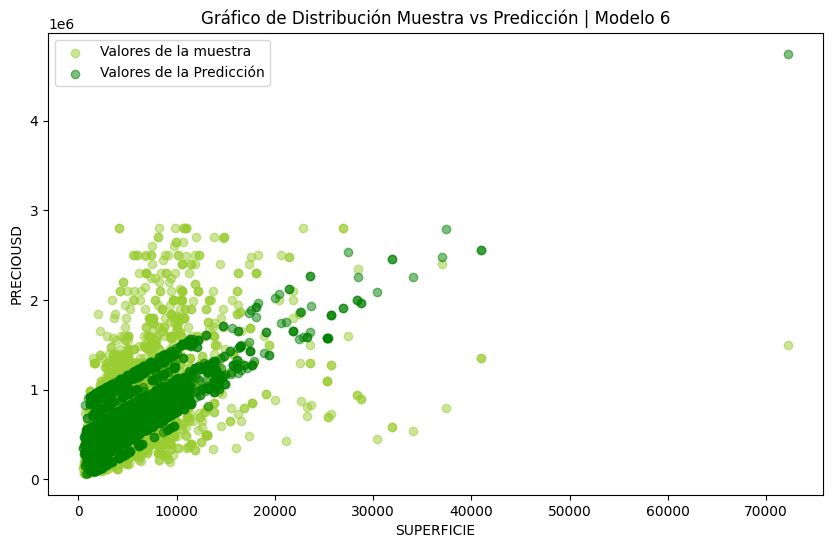

In [195]:
#Calculamos las predicciones
predicciones6= resultados6.predict()

# Creamos el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(X['sup_edif'], gdf6['PRECIOUSD'], label='Valores de la muestra', color='yellowgreen', alpha=0.5)
plt.scatter(X['sup_edif'], predicciones6, label='Valores de la Predicción', color='green', alpha=0.5)

# Configuramos etiquetas de ejes y leyenda
plt.xlabel('SUPERFICIE')
plt.ylabel('PRECIOUSD')
plt.legend(loc='best')

# Agregamos un título al gráfico
plt.title('Gráfico de Distribución Muestra vs Predicción | Modelo 6')

# Guardamos el gráfico como un objeto
grafico_dispersion_modelo6 = plt.gcf()

# Conclusión

A partir del trabajo realizado, resaltamos los siguientes aprendizajes:

- El estudio de los fenómenos urbanos debe ser estudiado de manera integral, entendiendo la inmensa complejidad que supone. Intentar entenderlos o explicarlos desde un solo enfoque conduce a resultados sesgados que no pueden considerarse confiables para la toma de decisiones a la hora de contruír políticas públicas.

- Si bien nuestro trabajo no es exhaustivo, apreciamos el progreso que se puede hacer mirando en profundidad los datos, incorporando distintas herramientas, y estando dispuestos a cuestionar constantemente los preconceptos del propio bagaje para no condicionar el análisis.

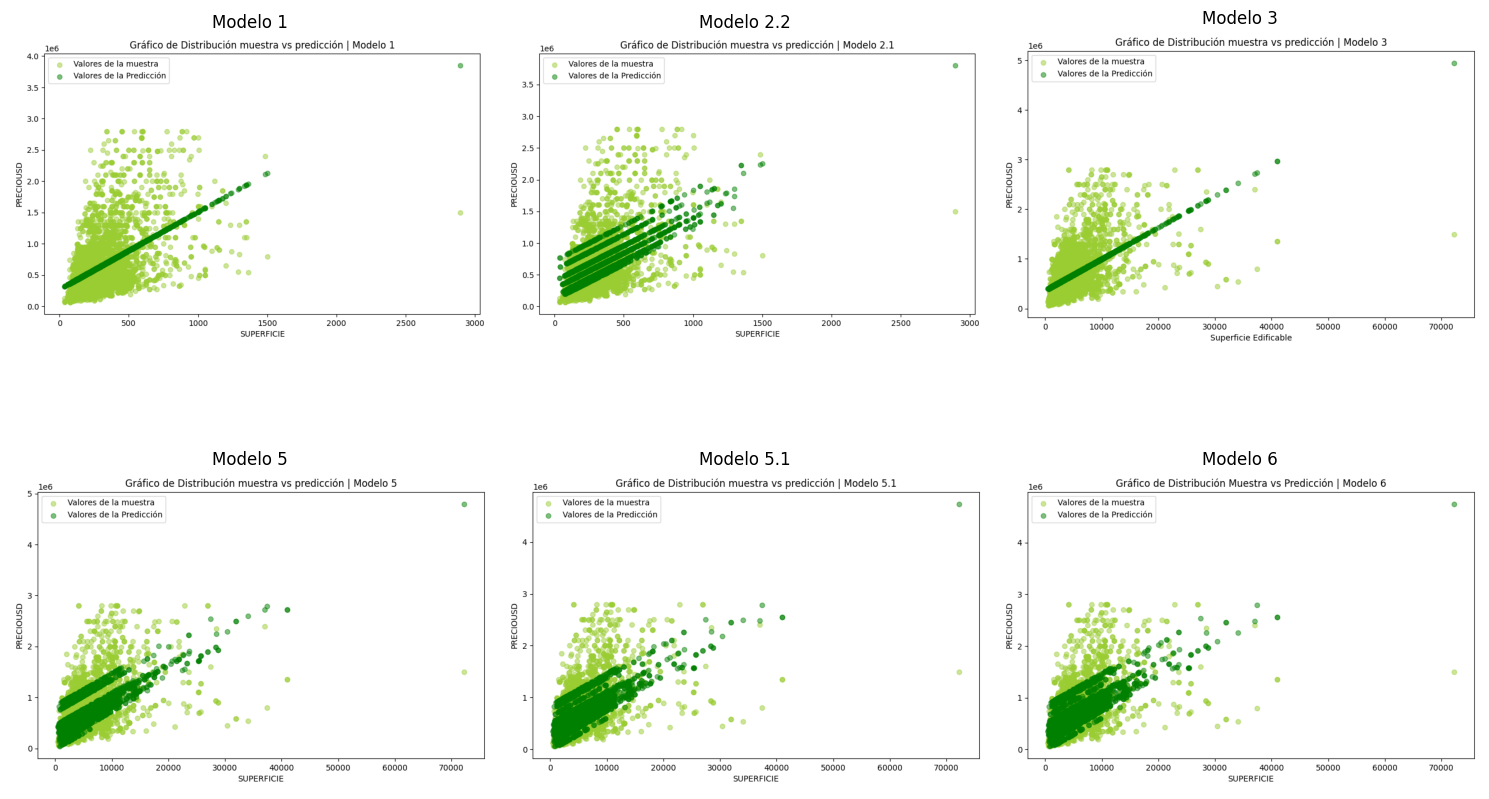

In [199]:
import matplotlib.pyplot as plt

# Crear una figura con una cuadrícula de subgráficos de 2 filas y 3 columnas
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Gráfico 1 (arriba a la izquierda)
axs[0, 0].imshow(grafico_dispersion_modelo1.canvas.renderer.buffer_rgba())  # Muestra el primer gráfico
axs[0, 0].set_title('Modelo 1')
axs[0, 0].axis('off')  # Elimina ejes y contorno

# Gráfico 2 (arriba en el centro)
axs[0, 1].imshow(grafico_dispersion_modelo2_1.canvas.renderer.buffer_rgba())  # Muestra el segundo gráfico
axs[0, 1].set_title('Modelo 2.2')
axs[0, 1].axis('off')  # Elimina ejes y contorno

# Gráfico 3 (arriba a la derecha)
axs[0, 2].imshow(grafico_dispersion_modelo3.canvas.renderer.buffer_rgba())  # Muestra el tercer gráfico
axs[0, 2].set_title('Modelo 3')
axs[0, 2].axis('off')  # Elimina ejes y contorno

# Gráfico 4 (abajo a la izquierda)
axs[1, 0].imshow(grafico_dispersion_modelo5.canvas.renderer.buffer_rgba())  # Muestra el cuarto gráfico
axs[1, 0].set_title('Modelo 5')
axs[1, 0].axis('off')  # Elimina ejes y contorno

# Gráfico 5 (abajo en el centro)
axs[1, 1].imshow(grafico_dispersion_modelo5_1.canvas.renderer.buffer_rgba())  # Muestra el quinto gráfico
axs[1, 1].set_title('Modelo 5.1')
axs[1, 1].axis('off')  # Elimina ejes y contorno

# Gráfico 6 (abajo a la derecha)
axs[1, 2].imshow(grafico_dispersion_modelo6.canvas.renderer.buffer_rgba())  # Muestra el sexto gráfico
axs[1, 2].set_title('Modelo 6')
axs[1, 2].axis('off')  # Elimina ejes y contorno

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()
